## Summary

* Minimize the 10,000 dimensional Rosenbrock with PMB, and with other algorithms in `scipy.optimize.minimize`.
* For comparison, iterations are limited to 200, or function calls are limited to 240.
* Only L-BFGS-B algorithm is comparable to PMB for this problem. They both find the global minimum rapidly.
* Conjugate Gradient, Newton-CG, and Truncated Newton algorithms quickly find a solution, but not the global minimum of 0.
* Powell, BFGS, COBYLA, and SLSQP algorithms do not stop after several minutes of runtime.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
from scipy.optimize import minimize
from pmb_scipy import pmbsolve

In [2]:
def rosenbrock(x, args=()):
    return np.sum( 100*(x[1:]-x[:-1]**2)**2 + (x[:-1]-1)**2 )
        
def rosenbrock_der(x, args=()):
    g = np.zeros(len(x))
    g[1:-1] = 200*(x[1:-1] - x[:-2]**2) - 400*(x[2:] - x[1:-1]**2)*x[1:-1] + 2*(x[1:-1]-1)
    g[0] = -400*x[0]*(x[1]-x[0]**2) + 2*(x[0]-1)
    g[-1] = 200*(x[-1] - x[-2]**2)
    return g

In [3]:
n = 10000
x0 = 5.0 + np.random.rand(n)*10.0

## Solve with PMB

In [10]:
res = minimize(rosenbrock, x0, jac=rosenbrock_der, method=pmbsolve, options={"maxiter":200, "keephistory": True})

In [11]:
print(res.message)
print("Final function value:", res.fun)
print("Number of function evaluations:", res.nfev)
print("Number of outer iterations:", res.nit)
print("Number of inner iterations:", res.nmbs)
print("Wallclock time:", res.time)

Converged to the minimum function value within ftol.
('Final function value:', 1.6588384002896766e-08)
('Number of function evaluations:', 92)
('Number of outer iterations:', 82)
('Number of inner iterations:', 10)
('Wallclock time:', 0.08926701545715332)


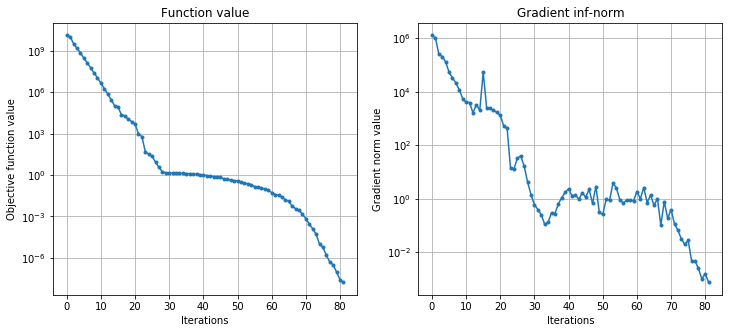

In [12]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.grid(True)
plt.semilogy(res.fhist,".-")
plt.xlabel("Iterations")
plt.ylabel("Objective function value")
plt.title("Function value")

# The gradient norm values vs. iteration    
plt.subplot(1,2,2)
plt.grid(True)
plt.semilogy(res.nghist,".-")
plt.xlabel("Iterations")
plt.ylabel("Gradient norm value")
plt.title("Gradient inf-norm");

## Solve with L-BFGS-B

In [15]:
res = minimize(rosenbrock, x0, jac=rosenbrock_der, method="L-BFGS-B",
               options={"maxiter":200, "maxcor":5})

In [16]:
print(res.message)
print("Final function value:", res.fun)
print("Number of function evaluations:", res.nfev)
print("Number of iterations:", res.nit)

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
('Final function value:', 6.8604892765524889e-09)
('Number of function evaluations:', 110)
('Number of iterations:', 96)


Finds the solution to a higher accuracy with a slightly higher number of function evaluations and iterations.

## Solve with Newton-CG

In [17]:
res = minimize(rosenbrock, x0, jac=rosenbrock_der, method="Newton-CG",
               options={"maxiter":200})

In [18]:
print(res.message)
print("Final function value:", res.fun)
print("Number of function evaluations:", res.nfev)
print("Number of iterations:", res.nit)

Optimization terminated successfully.
('Final function value:', 6.964247165499408)
('Number of function evaluations:', 20)
('Number of iterations:', 17)


This is fast, but converges to an incorrect solution.
Repeat several times with other random initial conditions:

In [19]:
for i in range(10):
    x0 = 5.0 + np.random.rand(n)*10.0
    res = minimize(rosenbrock, x0, jac=rosenbrock_der, method="Newton-CG",
                   options={"maxiter":200})
    print(res.message)
    print("Final function value:", res.fun)
    print("Number of function evaluations:", res.nfev)
    print("Number of iterations:", res.nit)

Optimization terminated successfully.
('Final function value:', 2.9721234429559793)
('Number of function evaluations:', 22)
('Number of iterations:', 18)
Optimization terminated successfully.
('Final function value:', 2.4157574563999824)
('Number of function evaluations:', 21)
('Number of iterations:', 18)
Optimization terminated successfully.
('Final function value:', 2.6321374346840645)
('Number of function evaluations:', 24)
('Number of iterations:', 19)
Optimization terminated successfully.
('Final function value:', 9.758866722578688)
('Number of function evaluations:', 17)
('Number of iterations:', 16)
Optimization terminated successfully.
('Final function value:', 9.725273602104764)
('Number of function evaluations:', 17)
('Number of iterations:', 16)
Optimization terminated successfully.
('Final function value:', 6.751120488863921)
('Number of function evaluations:', 18)
('Number of iterations:', 17)
Optimization terminated successfully.
('Final function value:', 8.2684368937716

This algorithm's results depend a lot on the starting point.

## Solve with Truncated Newton (TNC)

This one takes maximum function calls, not iterations.

In [20]:
res = minimize(rosenbrock, x0, jac=rosenbrock_der, method="TNC",
               options={"maxiter":240})

In [21]:
print(res.message)
print("Final function value:", res.fun)
print("Number of function evaluations:", res.nfev)
print("Number of iterations:", res.nit)

Max. number of function evaluations reached
('Final function value:', 20129.376839108045)
('Number of function evaluations:', 240)
('Number of iterations:', 28)


Does not converge within the specified number of function calls.

## Conjugate gradient method (CG)

In [22]:
res = minimize(rosenbrock, x0, jac=rosenbrock_der, method="CG",
               options={"maxiter":200})

In [23]:
print(res.message)
print("Final function value:", res.fun)
print("Number of function evaluations:", res.nfev)
print("Number of iterations:", res.nit)

Maximum number of iterations has been exceeded.
('Final function value:', 11782.007862741853)
('Number of function evaluations:', 330)
('Number of iterations:', 200)


Does not converge within the specified number of iterations.

## Other methods

The following methods do not complete 200 iterations within several minutes. Computation interrupted.
* Powell
* BFGS
* COBYLA
* SLSQP